## Uppgift 1
### Landstatistik

Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med hashfunktionen SHA-256.

Undersök därefter hur det gått för landet i OS genom tiderna.

Visualisera exempelvis:

- de sporter landet fått flest medaljer i


In [1]:
import pandas as pd
import hashlib as hl

anon_df = pd.read_csv("athlete_events.csv")
anon_df["Name"] = anon_df["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())

anon_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
df_gbr = anon_df[anon_df["NOC"] == "GBR"]

df_gbr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,068d40aa50057f323cccc9b76161d21e3014635a0bd3b4...,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN
786,453,068d40aa50057f323cccc9b76161d21e3014635a0bd3b4...,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN
888,509,ad4b525a32fc54f54d6221545f27ff31d81200fa3bc741...,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN
889,509,ad4b525a32fc54f54d6221545f27ff31d81200fa3bc741...,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
890,509,ad4b525a32fc54f54d6221545f27ff31d81200fa3bc741...,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269996,135072,ce130984eab3c618fee7fa4c4e19f3ff3d4ca5d8446183...,F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269997,135072,ce130984eab3c618fee7fa4c4e19f3ff3d4ca5d8446183...,F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,06b1a31455a352e09fd55fbbc837f1d1b332af23b7ea62...,F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,06b1a31455a352e09fd55fbbc837f1d1b332af23b7ea62...,F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [4]:
sport_medals = df_gbr.groupby("Sport", observed=True)[["Medal"]].count() 
top_10_sports = sport_medals.sort_values(by="Medal", ascending=False).head(10)

top_10_sports 

,Medal
Sport,
Athletics,338
Rowing,270
Cycling,182
Hockey,163
Sailing,143
Swimming,127
Shooting,99
Equestrianism,83
Tennis,67


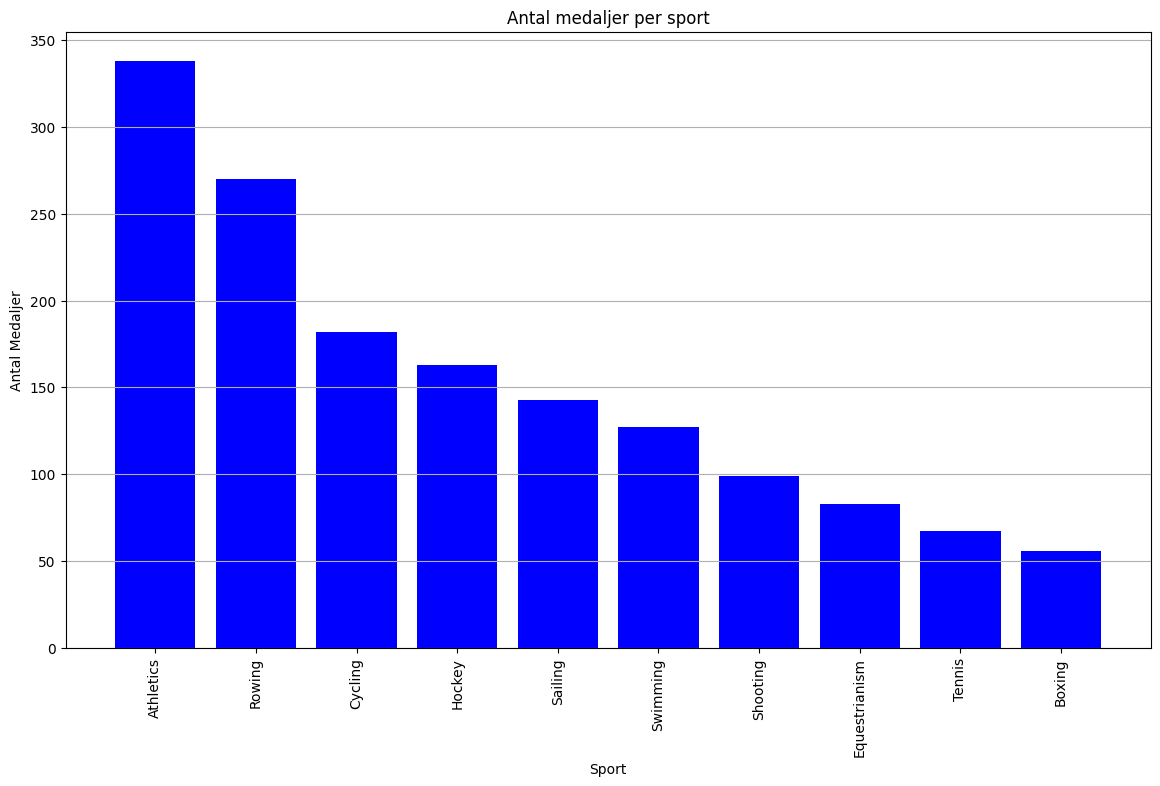

In [5]:
import matplotlib.pyplot as plt

sport_medals = df_gbr.groupby("Sport")["Medal"].count().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(top_10_sports.index, top_10_sports["Medal"], color="blue")
plt.xticks(rotation=90)
plt.title("Antal medaljer per sport")
plt.ylabel("Antal Medaljer")
plt.xlabel("Sport")
plt.grid(axis="y")
plt.show()


- antal medaljer per OS


In [6]:
os_medals = df_gbr.groupby("Games", observed=True)[["Medal"]].count()

os_medals

,Medal
Games,
1896 Summer,9
1900 Summer,108
1904 Summer,2
1906 Summer,39
1908 Summer,368
1912 Summer,170
1920 Summer,111
1924 Summer,64
1924 Winter,31


In [ ]:
os_type_medals = df_gbr.groupby(['Games', 'Medal'], observed=True).size().unstack(fill_value=0) # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html, 

os_type_medals

Medal,Bronze,Gold,Silver
Games,,,
1896 Summer,3,3,3
1900 Summer,15,59,34
1904 Summer,0,1,1
1906 Summer,8,9,22
1908 Summer,90,147,131
1912 Summer,59,47,64
1920 Summer,17,52,42
1924 Summer,19,15,30
1924 Winter,11,16,4


Oldest participant = 84.0
Youngest participant = 11.0
Rounding the age difference to divide ages in group aka bins = 8.0


<Axes: title={'center': 'OS-GBR: Participants Ages'}, xlabel='Age Bracket', ylabel='Number of individuals'>

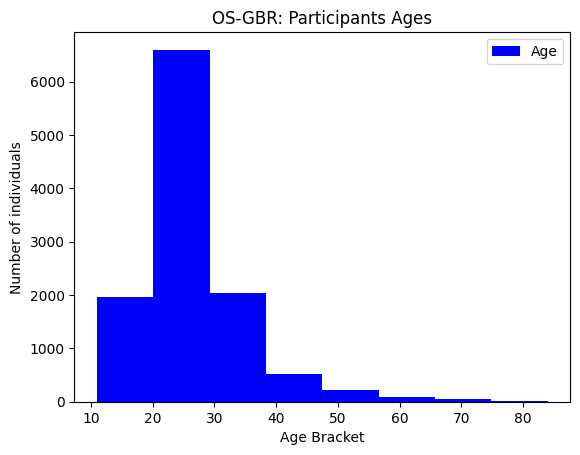

In [10]:
print(f"Oldest participant =", df_gbr["Age"].max())
print(f"Youngest participant =", df_gbr["Age"].min())
print(f"Rounding the age difference to divide ages in group aka bins =", round(84/11,0))

df_gbr.plot(column = "Age", kind = "hist", xlabel = "Age Bracket", ylabel = "Number of individuals", bins=8, color="blue", title="OS-GBR: Participants Ages") # https://www.geeksforgeeks.org/pandas-dataframe-hist/

- histogram över åldra

Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.